In [1]:
#Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#Читаем файл, один столбец - данные по оси X, остальные - по оси Y и погершности.
def make_table(file_name):
    array_to_return = pd.read_csv(file_name, sep = ",")
    return array_to_return.values

data = make_table("C:\\\\Users\\\\Home\\\\data graph.csv")
print(data)

[[0.01099101 1.65634765 0.01       1.48512067 0.01      ]
 [0.04274514 1.65427731 0.01       1.49356398 0.01      ]
 [0.09096094 1.6578397  0.01       1.51563135 0.01      ]
 [0.15021397 1.65848798 0.01       1.51011646 0.01      ]
 [0.212523   1.66169378 0.01       1.52564784 0.01      ]
 [0.27013745 1.66624259 0.01       1.53318025 0.01      ]
 [0.32220208 1.65547126 0.01       1.54987504 0.01      ]]


In [8]:
#Реализация мнк
def find_mnk_param(X, Y):
    n = X.shape[0]
    aver_x = X.sum() / n
    aver_y = Y.sum() / n
    aver_xy = np.dot(X, Y) / n
    aver_xx = np.dot(X, X) / n
    aver_yy = np.dot(Y, Y) / n
    a = (aver_xy - aver_x * aver_y) / (aver_xx - aver_x ** 2)
    b = aver_y - a * aver_x
    er_a = (1 / n * ((aver_yy - aver_y ** 2) / (aver_xx - aver_x ** 2) - a ** 2)) ** 0.5
    er_b = er_a * ((aver_xx - aver_x ** 2) ** 0.5)
    print('a = ', a, '\nb = ', b, '\nerror of a = ', er_a, '\nerror of b = ', er_b)
    print('rel_er_a = ', er_a / abs(a) * 100, "%\nrel_er_b = ", er_b / abs(b) *100, '%')
    return a, b, er_a, er_b

def mnk_line(X, a, b):
    return a * X + b

def error_mnk(X, er_a, er_b):
    return (X ** 2 * er_a ** 2 + er_b ** 2) ** 0.5

def draw_mnk_line(X, Y, err_Y, line_label, err_X = 0):
    a, b, er_a, er_b = find_mnk_param(X, Y)
    errors = error_mnk(X, er_a, er_b) + err_Y
    plt.errorbar(X, Y, xerr = err_X, yerr = errors, ls='none')
    plt.plot(X, Y, markersize = 5, marker = 'o', linestyle = '')
    plt.plot(X, mnk_line(X, a, b), label = line_label)

In [13]:
#Реализация хи-квадрат
def find_hi_square_param(X, Y, err):
    W = (1/(err**2)).sum()
    weight_aver_x = np.dot(X, 1/(err**2)) / W
    weight_aver_y = np.dot(Y, 1/(err**2)) / W
    weight_aver_xy = np.dot(X*Y, 1/(err**2)) / W
    weight_aver_xx = np.dot(X*X, 1/(err**2)) / W
    weight_aver_yy = np.dot(Y*Y, 1/(err**2)) / W
    a = (weight_aver_xy - weight_aver_x*weight_aver_y) / (weight_aver_xx - weight_aver_x*weight_aver_x)
    b = weight_aver_y - a*weight_aver_x
    hi = ( 1/(err**2)*( Y - ( a*X+b ) )**2 ).sum()
    Da = (W*weight_aver_xy - W*b*weight_aver_x)**2 - W*weight_aver_xx*(W*weight_aver_yy - 2*W*b*weight_aver_y + W*b*b - 1 - hi)
    a1 = (W*weight_aver_xy - W*b*weight_aver_x + Da**0.5)/(W*weight_aver_xx)
    a2 = (W*weight_aver_xy - W*b*weight_aver_x - Da**0.5)/(W*weight_aver_xx)
    Db = (W*(weight_aver_y-a*weight_aver_x))**2 - W*(W*weight_aver_yy - 2*W*a*weight_aver_xy +W*a*a*weight_aver_xx-1-hi)
    b1 = (W*(weight_aver_y-a*weight_aver_x) + Db**0.5)/W
    b2 = (W*(weight_aver_y-weight_aver_x) - Db**0.5)/W
    print('a =', a, '\nb = ', b, '\nerror of a = ', er_a, '\nerror of b = ', er_b)
    print('hi =',hi)
    print('rel_er_a = ', er_a / abs(a) * 100, "%\nrel_er_b = ", er_b / abs(b) *100, '%')
    
def hi_square_line(X, a, b):
    return a * X + b

def error_hi_square(X, er_a, er_b):
    return (X ** 2 * er_a ** 2 + er_b ** 2) ** 0.5

def draw_hi_square_line(X, Y, err_Y, line_label, err_X = 0):
    a, b, er_a, er_b = find_mnk_param(X, Y)
    errors = error_hi_square(X, er_a, er_b) + err_Y
    plt.errorbar(X, Y, xerr = err_X, yerr = errors, ls='none')
    plt.plot(X, Y, markersize = 5, marker = 'o', linestyle = '')
    plt.plot(X, mnk_line(X, a, b), label = line_label)

a =  0.01700049454550561 
b =  1.6559519403084668 
error of a =  0.011692379438225202 
error of b =  0.001265145222367149
rel_er_a =  68.77670180080905 %
rel_er_b =  0.0763998755985322 %
a =  0.185613432952909 
b =  1.487000407559941 
error of a =  0.018843868459944648 
error of b =  0.0020389545412009577
rel_er_a =  10.152211593826523 %
rel_er_b =  0.13711862692403246 %


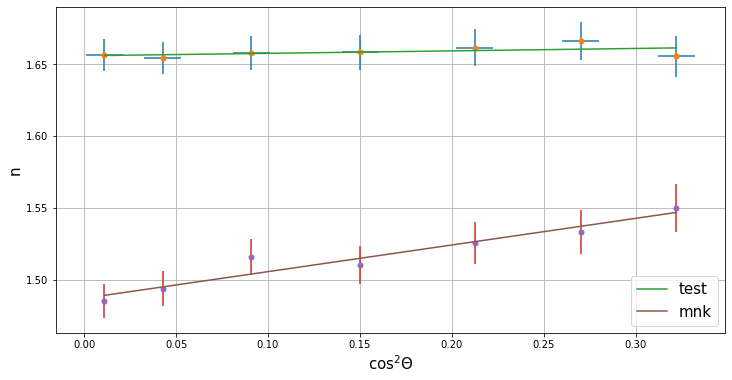

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

draw_hi_square_line(data[:, 0], data[:, 1], data[:, 2], "test", 0.01)
draw_mnk_line(data[:, 0], data[:, 3], data[:, 4], "mnk")

Y_name = 'n'
X_name = 'cos$^2 \Theta$'
plt.xlabel(X_name, fontsize = 15)
plt.ylabel(Y_name, fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)


plt.show()